In [93]:
from pathlib import Path
import skimage
from skimage import io
from skimage.transform import resize
from skimage.filters import unsharp_mask
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import os
import random
from matplotlib import pyplot as plt                    
%matplotlib inline

## Unsharpmasking Factor

In [17]:
def unsharpmask_factor(fileID, band):
    fires = np.load(fileID);
    height, width = fires.shape
    smallFires = resize(fires, (round(height/2), round(width/2)))
    blurryFires = resize(smallFires, (height, width))
    
    table = []
    n = 1
    while n <= 2:
        sharpened_img = unsharp_mask(blurryFires/blurryFires.max(), radius=1, amount=n)*blurryFires.max()
        controlmae = mean_absolute_error(fires, blurryFires)
        controlrmse = mean_squared_error(fires, blurryFires, squared=False)
        mae = mean_absolute_error(fires, sharpened_img)
        rmse = mean_squared_error(fires, sharpened_img, squared=False)
        table.append({'Filename': fileID,'Band': band,'Factor': n, 'Control MAE': controlmae, 'Control RMSE': controlrmse, 'MAE': mae, 'RMSE': rmse})
        n += .1
    
    return pd.DataFrame(table)

In [18]:
unsharpmask_factor('../../GOES_Files/test_files/difference.npy','bt')

,Filename,Band,Factor,Control MAE,Control RMSE,MAE,RMSE
0,../../GOES_Files/test_files/difference.npy,bt,1.0,0.670047,0.970412,0.561066,0.824451
1,../../GOES_Files/test_files/difference.npy,bt,1.1,0.670047,0.970412,0.554040,0.815082
2,../../GOES_Files/test_files/difference.npy,bt,1.2,0.670047,0.970412,0.547866,0.806846
3,../../GOES_Files/test_files/difference.npy,bt,1.3,0.670047,0.970412,0.542579,0.799759
4,../../GOES_Files/test_files/difference.npy,bt,1.4,0.670047,0.970412,0.538198,0.793842
5,../../GOES_Files/test_files/difference.npy,bt,1.5,0.670047,0.970412,0.534746,0.789129
6,../../GOES_Files/test_files/difference.npy,bt,1.6,0.670047,0.970412,0.532237,0.785645
7,../../GOES_Files/test_files/difference.npy,bt,1.7,0.670047,0.970412,0.530667,0.783405
8,../../GOES_Files/test_files/difference.npy,bt,1.8,0.670047,0.970412,0.530042,0.782431
9,../../GOES_Files/test_files/difference.npy,bt,1.9,0.670047,0.970412,0.530360,0.782721


## Unsharpmasking for One Band

In [159]:
def unsharpmask_files(path):
    table = []
    for file in os.listdir(path):
        img = np.load(path + file)
        band = file[19:21]
        height, width = img.shape
        smallimg = resize(img, (round(height/2), round(width/2)))
        blurryimg = resize(smallimg, (height, width))
        sharpimg = unsharp_mask(blurryimg, radius=1, amount=1)

        try:
            controlmae = mean_absolute_error(img, blurryimg)
            controlrmse = mean_squared_error(img, blurryimg, squared=False)
            mae = mean_absolute_error(img, sharpimg)
            rmse = mean_squared_error(img, sharpimg, squared=False)
            table.append({'File': file, 'Band': band, 'Control MAE': controlmae, 'Control RMSE': controlrmse, 'MAE': mae, 'RMSE': rmse})
        except:
            print(file)
    return pd.DataFrame(table)

In [158]:
x = unsharpmask_files('../../GOES_Files/')
agg_function = {'Control MAE': 'mean', 'Control RMSE': 'mean', 'MAE': 'mean', 'RMSE': 'mean'}
y = x.groupby(x['Band']).agg(agg_function)
print(y)

IsADirectoryError: [Errno 21] Is a directory: '../../GOES_Files/.git'

## Unsharpmasking for Difference Image

In [148]:
def unsharpmask_bt(path):
    """
    Creates difference array.
    """
    table = []
    for file in os.listdir(path):
        band = file[19:21]
        if band == '07':
            try:
                file14 = file[:19] + '14' + file[21:41]
                for x in os.listdir(path):
                    if x.startswith(file14):
                        file14 = x
                img07 = np.load(path + file)
                img14 = np.load(path + file14)
                img = img07 - img14
            
                height, width = img.shape
                smallimg = resize(img, (round(height/2), round(width/2)))
                blurryimg = resize(smallimg, (height, width))
                sharpimg = unsharp_mask(blurryimg/blurryimg.max(), radius=1, amount=1)*blurryimg.max()
                
                controlmae = mean_absolute_error(img, blurryimg)
                controlrmse = mean_squared_error(img, blurryimg, squared=False)
                mae = mean_absolute_error(img, sharpimg)
                rmse = mean_squared_error(img, sharpimg, squared=False)
                table.append({'File': file, 'Control MAE': controlmae, 'Control RMSE': controlrmse, 'MAE': mae, 'RMSE': rmse})
            except:
                print(file)
                pass
    return pd.DataFrame(table)

def unsharpmask_diff(fileList):
    """
    Uses difference files as input through a list of file names.
    """
    path = '../../GOES_Files/diff_files/'
    table = []
    for file in fileList:
        img = np.load(path + file)
        height, width = img.shape
        smallimg = resize(img, (round(height/2), round(width/2)))
        blurryimg = resize(smallimg, (height, width))
        sharpimg = unsharp_mask(blurryimg/blurryimg.max(), radius=1, amount=1)*blurryimg.max()
        try: 
            controlmae = mean_absolute_error(img, blurryimg)
            controlrmse = mean_squared_error(img, blurryimg, squared=False)
            mae = mean_absolute_error(img, sharpimg)
            rmse = mean_squared_error(img, sharpimg, squared=False)
            table.append({'File': file, 'Control MAE': controlmae, 'Control RMSE': controlrmse, 'MAE': mae, 'RMSE': rmse})
        except:
            print(file)
    return pd.DataFrame(table)

In [150]:
sharpened_images = unsharpmask_diff(random_files())
agg_function = {'Control MAE': 'mean', 'Control RMSE': 'mean', 'MAE': 'mean', 'RMSE': 'mean'}
z = sharpened_images.agg(agg_function)
print(z)

OR_ABI-L1b-RadC-M3Cdiff_G17_s20183200308190_e20183200308190_c20183200313481.npy
OR_ABI-L1b-RadC-M3Cdiff_G17_s20183241622189_e20183241624574_c20183241625012.npy
Control MAE     0.445765
Control RMSE    0.673558
MAE             0.380768
RMSE            0.579112
dtype: float64


## Evaluating Unsharpmask Error

In [51]:
img = np.load('../../GOES_Files/test_files/difference.npy');
height, width = img.shape
smallimg = resize(img, (round(height/2), round(width/2)))
blurryimg = resize(smallimg, (height, width))
sharpimg = unsharp_mask(blurryimg/smallimg.max(), radius=1, amount=1)*smallimg.max()

controlmae = mean_absolute_error(img, blurryimg)
controlrmse = mean_squared_error(img, blurryimg, squared=False)
mae = mean_absolute_error(img, sharpimg)
rmse = mean_squared_error(img, sharpimg, squared=False)
table = ({'Control MAE': controlmae, 'Control RMSE': controlrmse, 'MAE': mae, 'RMSE':rmse})
print(table)

{'Control MAE': 0.6700472, 'Control RMSE': 0.9704123, 'MAE': 0.5610107, 'RMSE': 0.82386035}


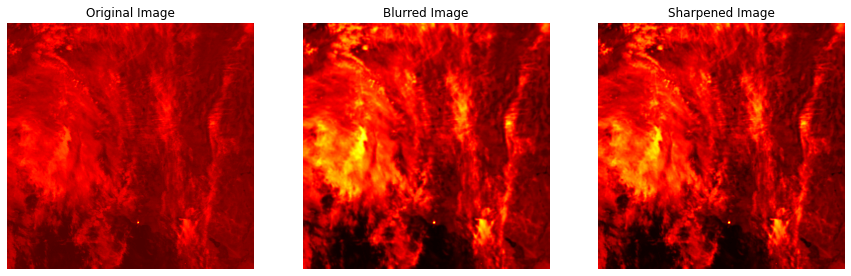

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

ax[0].imshow(img, cmap='hot', aspect='equal')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(blurryimg, cmap='hot', aspect='equal')
ax[1].set_title('Blurred Image')
ax[1].axis('off')

ax[2].imshow(sharpimg, cmap='hot', aspect='equal')
ax[2].set_title('Sharpened Image')
ax[2].axis('off')

plt.axis('off')
plt.show()

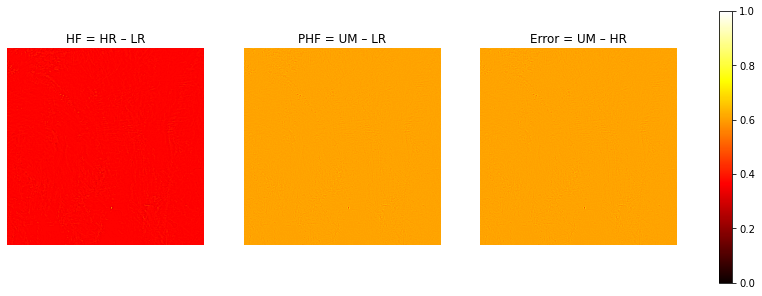

In [92]:
HF = img-blurryimg
normHF = (HF-HF.min())/(HF.max()-HF.min())

PHF = sharpimg-img
normPHF = (PHF-PHF.min())/(PHF.max()-PHF.min())

Error = sharpimg-img
normError = (Error-Error.min())/(Error.max()-Error.min())

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

x = ax[0].imshow(normHF, cmap='hot', aspect='equal')
ax[0].set_title('HF = HR – LR')
ax[0].axis('off')

y = ax[1].imshow(normPHF, cmap='hot', aspect='equal')
ax[1].set_title('PHF = UM – LR')
ax[1].axis('off')

z = ax[2].imshow(normError, cmap='hot', aspect='equal')
ax[2].set_title('Error = UM – HR')
ax[2].axis('off')

plt.colorbar(y, ax=ax)

plt.axis('off')
plt.show()

## Random Files

In [146]:
def random_files(n=20):
    """
    Randomly creates 20 difference files.
    """
    path = '../../GOES_Files/npy_files/'
    newpath = '../../GOES_Files/diff_files/'
    files = []

    while len(files)<n:
        file = random.choice(os.listdir(path))
        if file[19:21] == '07':
            file2 = file[:19] + '14' + file[21:41]
            for x in os.listdir(path):
                if x.startswith(file2):
                    file2 = x
                    band07 = np.load(path + file)
                    band14 = np.load(path + file2)
                    file = file[:19] + 'diff' + file[21:]
                    np.save(newpath+file, band07-band14)
                    files.append(file)
        elif file [19:21] == '14':
            file2 = file[:19] + '07' + file[21:]
            for x in os.listdir(path):
                if x.startswith(file2):
                    file2 = x
                    band07 = np.load(path + file2)
                    band14 = np.load(path + file)
                    file = file[:19] + 'diff' + file[21:]
                    np.save(newpath+file, band07-band14)
                    files.append(file)
    return files